In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [37]:
%%R
#install.packages('GGally')

NULL


In [1]:
%%R
#install.packages('GGally')
#install.packages('cowplot')
library(GGally)
library(tidyverse)
library(cowplot)

UsageError: Cell magic `%%R` not found.


In [7]:
%%R
df = read_csv("/content/combined_train.csv")

R[write to console]: Parsed with column specification:
cols(
  .default = col_character(),
  business_id = col_double(),
  FOLDERYEAR = col_double(),
  LicenceRSN = col_double(),
  LicenceRevisionNumber = col_double(),
  IssuedDate = col_date(format = ""),
  ExpiredDate = col_date(format = ""),
  House = col_double(),
  NumberofEmployees = col_double(),
  FeePaid = col_double(),
  ExtractDate = col_datetime(format = ""),
  Geom = col_logical(),
  label = col_double(),
  `Parking meters` = col_double(),
  `Disability parking` = col_double(),
  Unemployment_rate = col_double()
)

R[write to console]: See spec(...) for full column specifications.

R[write to console]: Warning:
R[write to console]:  193 parsing failures.
  row   col               expected actual                          file
22069 House no trailing characters A      '/content/combined_train.csv'
36376 House a double               B10293 '/content/combined_train.csv'
36377 House a double               B10293 '/content/combi

In [8]:
%%R
head(df)

# A tibble: 6 x 29
  business_id FOLDERYEAR LicenceRSN LicenceNumber LicenceRevision… BusinessName
        <dbl>      <dbl>      <dbl> <chr>                    <dbl> <chr>       
1           1       2018    3100450 18-516072                    0 "!Exotics B…
2           2       2004     804123 04-036444                    0 ".243 Racin…
3           2       2005     884526 05-112560                    0 ".243 Racin…
4           2       2006    1010837 06-140328                    0 ".243 Racin…
5           6       1997      41022 97-012466                    0 "\"return T…
6           6       1998     134205 98-173693                    0 "\"return T…
# … with 23 more variables: BusinessTradeName <chr>, Status <chr>,
#   IssuedDate <date>, ExpiredDate <date>, BusinessType <chr>,
#   BusinessSubType <chr>, Unit <chr>, UnitType <chr>, House <dbl>,
#   Street <chr>, City <chr>, Province <chr>, Country <chr>, PostalCode <chr>,
#   `Geo Local Area` <chr>, NumberofEmployees <dbl>, FeePaid <db

In [36]:
%%R
summary(df)

  business_id       FOLDERYEAR     LicenceRSN      LicenceNumber     
 Min.   :     1   Min.   :1996   Min.   :     20   Length:761045     
 1st Qu.: 64270   1st Qu.:2002   1st Qu.: 618518   Class :character  
 Median :121407   Median :2008   Median :1294811   Mode  :character  
 Mean   :122074   Mean   :2008   Mean   :1418144                     
 3rd Qu.:181591   3rd Qu.:2014   3rd Qu.:2150048                     
 Max.   :242227   Max.   :2019   Max.   :3541021                     
                                                                     
 LicenceRevisionNumber BusinessName       BusinessTradeName     Status         
 Min.   :0.00000       Length:761045      Length:761045      Length:761045     
 1st Qu.:0.00000       Class :character   Class :character   Class :character  
 Median :0.00000       Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.00906                                                               
 3rd Qu.:0.00000                        

In [34]:
%%R
split(names(df),sapply(df, function(x) paste(class(x), collapse=" ")))

$character
 [1] "LicenceNumber"     "BusinessName"      "BusinessTradeName"
 [4] "Status"            "BusinessType"      "BusinessSubType"  
 [7] "Unit"              "UnitType"          "Street"           
[10] "City"              "Province"          "Country"          
[13] "PostalCode"        "Geo Local Area"   

$Date
[1] "IssuedDate"  "ExpiredDate"

$logical
[1] "Geom"

$numeric
 [1] "business_id"           "FOLDERYEAR"            "LicenceRSN"           
 [4] "LicenceRevisionNumber" "House"                 "NumberofEmployees"    
 [7] "FeePaid"               "label"                 "Parking meters"       
[10] "Disability parking"    "Unemployment_rate"    

$`POSIXct POSIXt`
[1] "ExtractDate"



In [0]:
%%R
numerical_cols = c('NumberofEmployees', 'FeePaid', 'Parking meters', 'Disability parking', 'Unemployment_rate')

In [0]:
%%R
num_data <- 
    df %>% 
    dplyr::select(c(numerical_cols)) #%>% 
    #dplyr::mutate(label = as.factor(label))

In [44]:
%%R
num_data

# A tibble: 761,045 x 5
   NumberofEmployees FeePaid `Parking meters` `Disability park… Unemployment_ra…
               <dbl>   <dbl>            <dbl>             <dbl>            <dbl>
 1                 1     189               19              3771              4.4
 2                NA     100                7               312              6.8
 3                NA     103                7               312              5.7
 4                NA     106                7               312              4.4
 5                NA      85               10               940              8.5
 6                NA      93               10               940              8.8
 7                NA      85               19              3771              8.5
 8                NA      93               19              3771              8.8
 9                NA      90               19              3771              8.3
10                NA      NA               NA                NA              8.5
# … 

In [0]:
%%R
colnames(num_data) <- make.names(c(num_vars = c('NumberofEmployees', 'FeePaid', 'Parking meters', 'Disability parking', 'Unemployment_rate')))

In [46]:
%%R
colnames(num_data)

[1] "NumberofEmployees"  "FeePaid"            "Parking.meters"    
[4] "Disability.parking" "Unemployment_rate" 


In [0]:
%%R
p2 <- ggpairs(num_data, columnLabels=gsub('.', ' ', colnames(num_data), fixed = T), labeller = label_wrap_gen(10))+ theme(axis.text.x = element_text(angle = 90, hjust = 1))

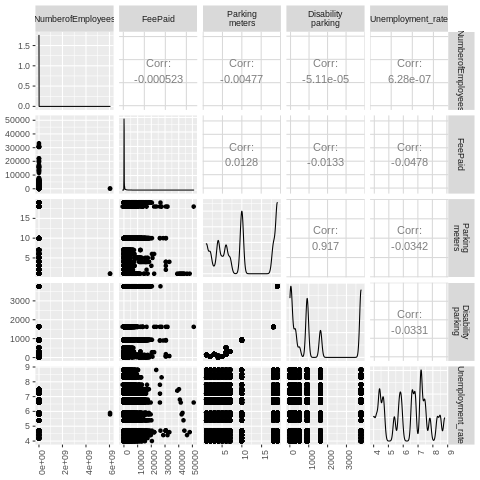

In [48]:
%%R
p2

In [49]:
%%R
ggsave(plot = p2, filename = paste0("numerical.png"))

R[write to console]: Saving 6.67 x 6.67 in image



In [0]:
%%R
cat_vars = c('FOLDERYEAR', 'BusinessType', 'BusinessSubType', 'Geo Local Area')

In [0]:
%%R
cat_data <- 
    df %>% 
    dplyr::select((cat_vars)) 

In [0]:
%%R
colnames(cat_data) <- make.names(c(cat_vars = c('FOLDERYEAR', 'BusinessType', 'BusinessSubType', 'Geo Local Area')))

In [62]:
%%R
#p3 <- ggpairs(cat_data, columnLabels=gsub('.', ' ', colnames(cat_data), fixed = T), labeller = label_wrap_gen(10))+ theme(axis.text.x = element_text(angle = 90, hjust = 1))

R[write to console]: Error in stop_if_high_cardinality(data, columns, cardinality_threshold) : 
  Column 'BusinessType' has more levels (220) than the threshold (15) allowed.
Please remove the column or increase the 'cardinality_threshold' parameter. Increasing the cardinality_threshold may produce long processing times
Calls: <Anonymous> ... <Anonymous> -> withVisible -> ggpairs -> stop_if_high_cardinality




Error in stop_if_high_cardinality(data, columns, cardinality_threshold) : 
  Column 'BusinessType' has more levels (220) than the threshold (15) allowed.
Please remove the column or increase the 'cardinality_threshold' parameter. Increasing the cardinality_threshold may produce long processing times
Calls: <Anonymous> ... <Anonymous> -> withVisible -> ggpairs -> stop_if_high_cardinality


In [65]:
%%R
head(df)

# A tibble: 6 x 29
  business_id FOLDERYEAR LicenceRSN LicenceNumber LicenceRevision… BusinessName
        <dbl>      <dbl>      <dbl> <chr>                    <dbl> <chr>       
1           1       2018    3100450 18-516072                    0 "!Exotics B…
2           2       2004     804123 04-036444                    0 ".243 Racin…
3           2       2005     884526 05-112560                    0 ".243 Racin…
4           2       2006    1010837 06-140328                    0 ".243 Racin…
5           6       1997      41022 97-012466                    0 "\"return T…
6           6       1998     134205 98-173693                    0 "\"return T…
# … with 23 more variables: BusinessTradeName <chr>, Status <chr>,
#   IssuedDate <date>, ExpiredDate <date>, BusinessType <chr>,
#   BusinessSubType <chr>, Unit <chr>, UnitType <chr>, House <dbl>,
#   Street <chr>, City <chr>, Province <chr>, Country <chr>, PostalCode <chr>,
#   `Geo Local Area` <chr>, NumberofEmployees <dbl>, FeePaid <db

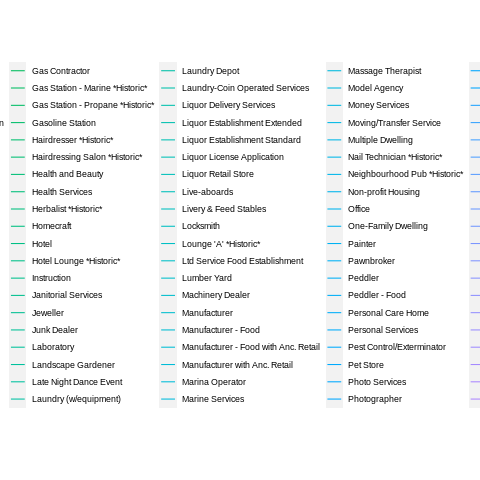

In [69]:
%%R
ggplot(data = df, mapping = aes(x = FOLDERYEAR, y=..density..))+geom_freqpoly(mapping = aes(colour = BusinessType), binwidth = 500)


In [0]:
import pandas as pd
import altair as alt

In [0]:
df = pd.read_csv("/content/combined_train.csv", encoding='latin-1')

In [8]:
df.head()

,business_id,FOLDERYEAR,LicenceRSN,LicenceNumber,LicenceRevisionNumber,BusinessName,BusinessTradeName,Status,IssuedDate,ExpiredDate,BusinessType,BusinessSubType,Unit,UnitType,House,Street,City,Province,Country,PostalCode,Geo Local Area,NumberofEmployees,FeePaid,ExtractDate,Geom,label,Parking meters,Disability parking,Unemployment_rate
0,1,2018,3100450,18-516072,0.0,!Exotics BySIYTHE Corporation,NaN,Issued,2018-02-14,2018-12-31,Office,Design Company,170,Unit,422,RICHARDS ST,vancouver,BC,CA,V6B 2Z4,Downtown,1.0,189.0,2020-04-01 09:32:19,NaN,1,19.0,3771.0,4.4
1,2,2004,804123,04-036444,0.0,.243 Racing Inc,NaN,Issued,2004-04-07,2004-12-31,Wholesale Dealer,NaN,NaN,NaN,1725,POWELL ST,vancouver,BC,CA,V5L 1H6,Grandview-Woodland,NaN,100.0,2019-07-21 13:48:32,NaN,1,7.0,312.0,6.8
2,2,2005,884526,05-112560,0.0,.243 Racing Inc,NaN,Issued,2004-12-23,2005-12-31,Wholesale Dealer,NaN,NaN,NaN,1725,POWELL ST,vancouver,BC,CA,V5L 1H6,Grandview-Woodland,NaN,103.0,2019-07-21 13:48:35,NaN,1,7.0,312.0,5.7
3,2,2006,1010837,06-140328,0.0,.243 Racing Inc,NaN,Issued,2005-12-12,2006-12-31,Wholesale Dealer,NaN,NaN,NaN,1725,POWELL ST,vancouver,BC,CA,V5L 1H6,Grandview-Woodland,NaN,106.0,2019-07-21 13:48:41,NaN,0,7.0,312.0,4.4
4,6,1997,41022,97-012466,0.0,"""return To Sender"" Cards & Novelties Inc",NaN,Issued,1997-02-20,1997-12-31,Retail Dealer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West End,NaN,85.0,2019-07-21 13:47:54,NaN,1,10.0,940.0,8.5


In [0]:
def make_plot(feature):
    """
    Plots the bar plot of the feature variable against the target variable

    Parameters
    ----------
    feature: list of strings
             categorical feature name(s) in the dataset 

    Returns
    -------
    plot: altair.vegalite.v3.api.Chart
          A bar plot of the feature variable against the target variable

    Examples
    --------
    >>> make_plot("Sex")
    """
    
    plot = alt.Chart(df_1).mark_bar().encode(
        alt.X(feature, type = "nominal"),
        alt.Y("count()", title = "Toatl Licenses Issued",axis=alt.Axis(grid=False))
        ).properties(width=1200, height=400).configure_header(title=None
        ).configure_axis(titleFontSize=18, titleFontWeight = 400, labelFontWeight = 400, labelFontSize = 16
        ).configure_mark(opacity=0.6)
    return plot

In [13]:
make_plot('FOLDERYEAR')

alt.Chart(...)

In [11]:
df_1 = df.groupby(["FOLDERYEAR","BusinessType"],as_index=False)[["label"]].count()
df_1

,FOLDERYEAR,BusinessType,label
0,1996,Office,1
1,1996,Plumber,1
2,1996,Wholesale Dealer,1
3,1997,Acupuncturist *Historic*,36
4,1997,Adult Entertainment Store,4
...,...,...,...
3746,2019,Wholesale Dealer,283
3747,2019,Wholesale Dealer - Food,62
3748,2019,Wholesale Dealer - Food with Anc. Retail,1
3749,2019,Wholesale Dealer w/ Anc. Retail,7


In [0]:
cat_vars = c('FOLDERYEAR', 'BusinessType', 'BusinessSubType', 'Geo Local Area')

In [16]:
alt.Chart(df_1).mark_bar().encode(
    alt.X(alt.repeat(), type='ordinal'),
    y='count()'
).repeat(['FOLDERYEAR',"BusinessType"])

alt.RepeatChart(...)

In [0]:
brush = alt.selection_interval()

In [26]:
df_1

,FOLDERYEAR,BusinessType,label
0,1996,Office,1
1,1996,Plumber,1
2,1996,Wholesale Dealer,1
3,1997,Acupuncturist *Historic*,36
4,1997,Adult Entertainment Store,4
...,...,...,...
3746,2019,Wholesale Dealer,283
3747,2019,Wholesale Dealer - Food,62
3748,2019,Wholesale Dealer - Food with Anc. Retail,1
3749,2019,Wholesale Dealer w/ Anc. Retail,7


In [0]:
points = alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).add_selection(
    brush
)
bars = alt.Chart(cars).mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush
)
points & bars

In [31]:
points = alt.Chart(df_1).mark_line().encode(
    x='BusinessType:N',
    y='label:Q',
    color=('FOLDERYEAR:O'))

points


alt.Chart(...)

In [36]:
alt.Chart(df_1).mark_bar().encode(alt.X('BusinessType',type = "nominal"),alt.Y("count(label):Q",title = "Licenses issued")).add_selection(
    brush
)

alt.Chart(...)

In [72]:
df_1

,FOLDERYEAR,BusinessType,label
0,1996,Janitorial Services,1
1,1996,Office,3
2,1996,Plumber,1
3,1996,Retail Dealer,1
4,1996,Wholesale Dealer,1
...,...,...,...
3922,2019,Wholesale Dealer,607
3923,2019,Wholesale Dealer - Food,148
3924,2019,Wholesale Dealer - Food with Anc. Retail,3
3925,2019,Wholesale Dealer w/ Anc. Retail,20
